In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv("train price .csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

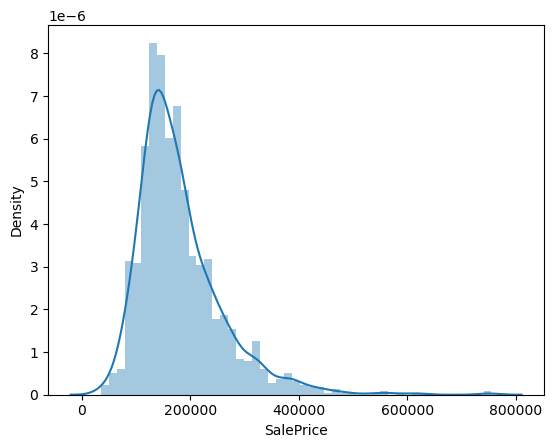

In [9]:
sns.distplot(df['SalePrice'])

In [10]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew()) #الانحراف 
print("Kurtosis: %f" % df['SalePrice'].kurt()) #التنوع

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

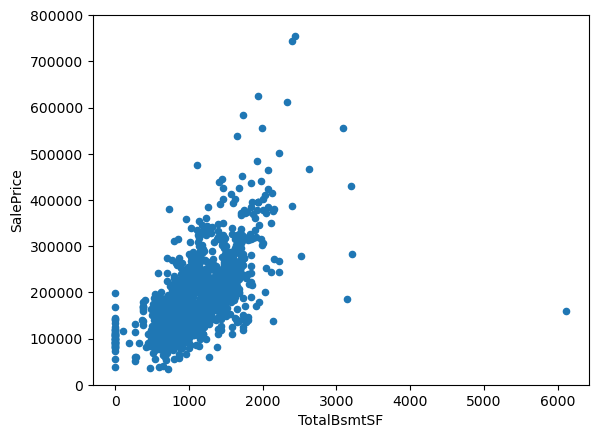

In [11]:
x='TotalBsmtSF'
data=pd.concat([df['SalePrice'],df[x]],axis=1)
data.plot.scatter(x=x, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

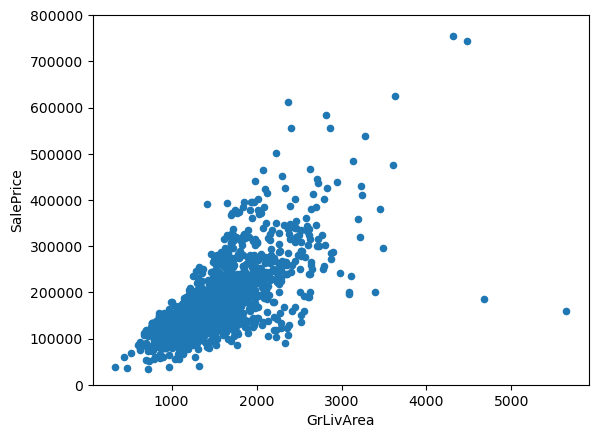

In [12]:

x='GrLivArea'
data=pd.concat([df['SalePrice'],df[x]],axis=1)
data.plot.scatter(x=x, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

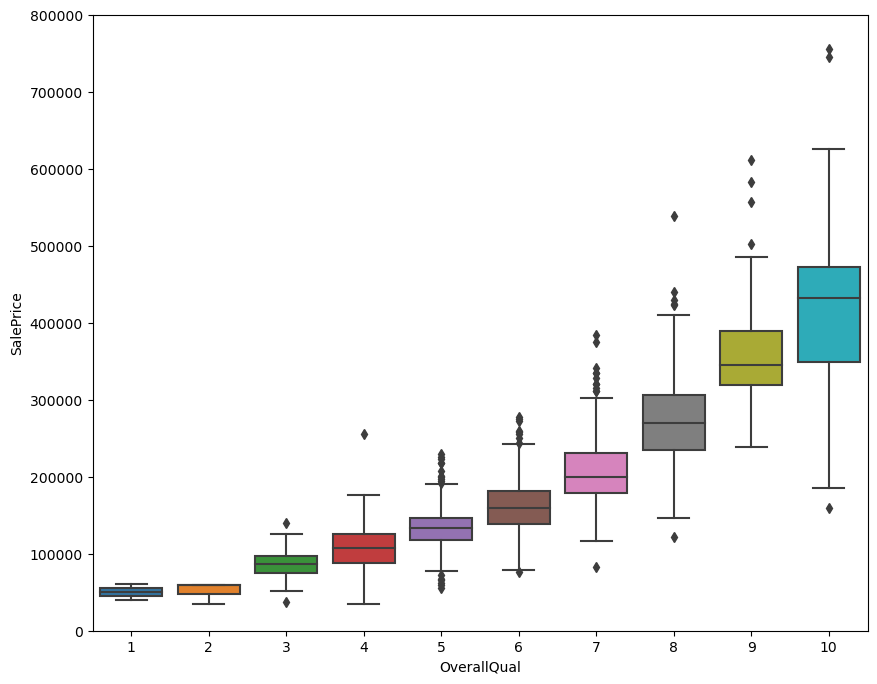

In [13]:
x='OverallQual' 
data=pd.concat([df['SalePrice'],df[x]],axis=1)
ax,fig=plt.subplots(figsize=(10,8))

fig=sns.boxplot(data=data,x=x,y='SalePrice')
fig.axis(ymin=0,ymax=800000)

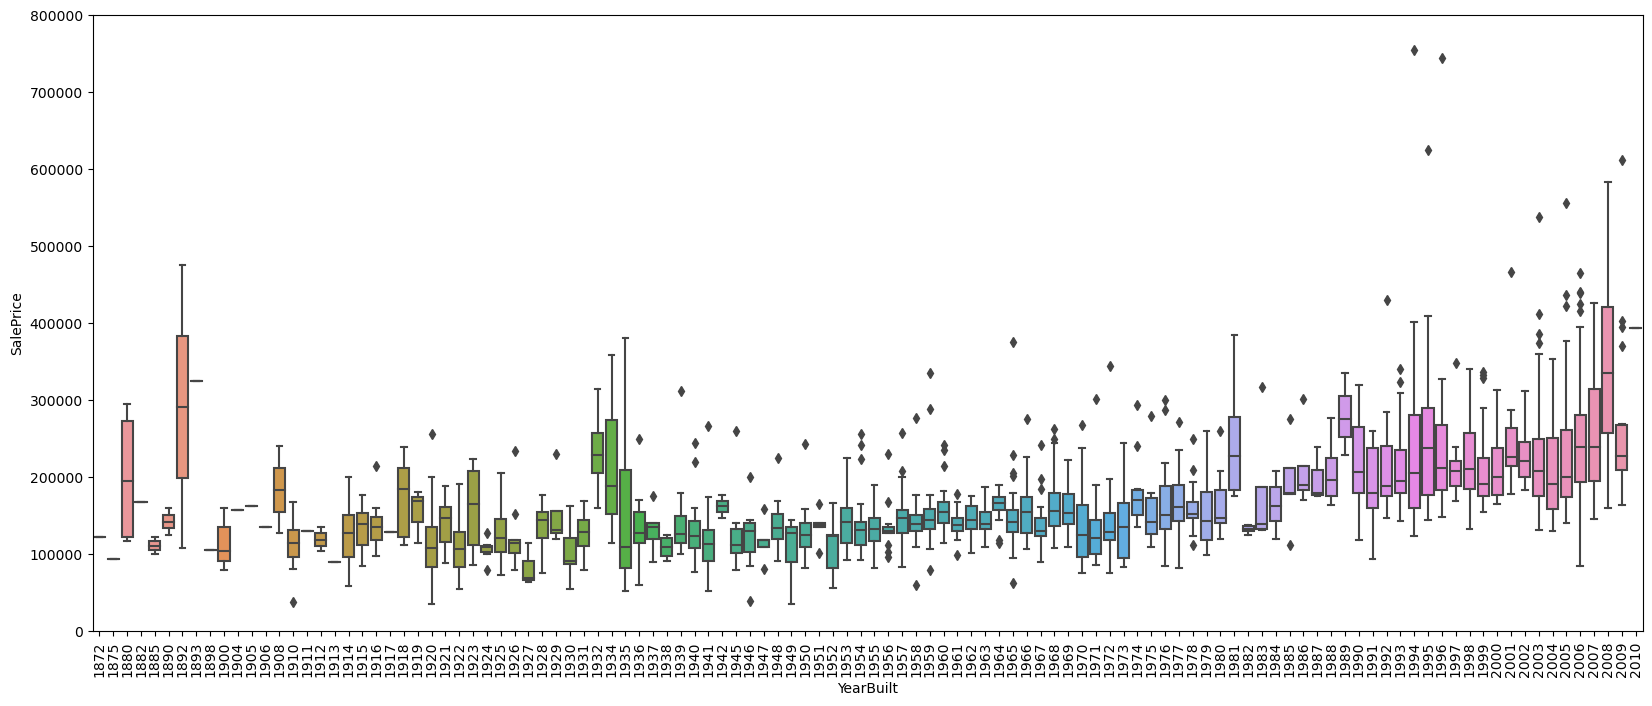

In [14]:

x='YearBuilt' 
data=pd.concat([df['SalePrice'],df[x]],axis=1)
ax,fig=plt.subplots(figsize=(20,8))

fig=sns.boxplot(data=data,x=x,y='SalePrice')
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation=90);

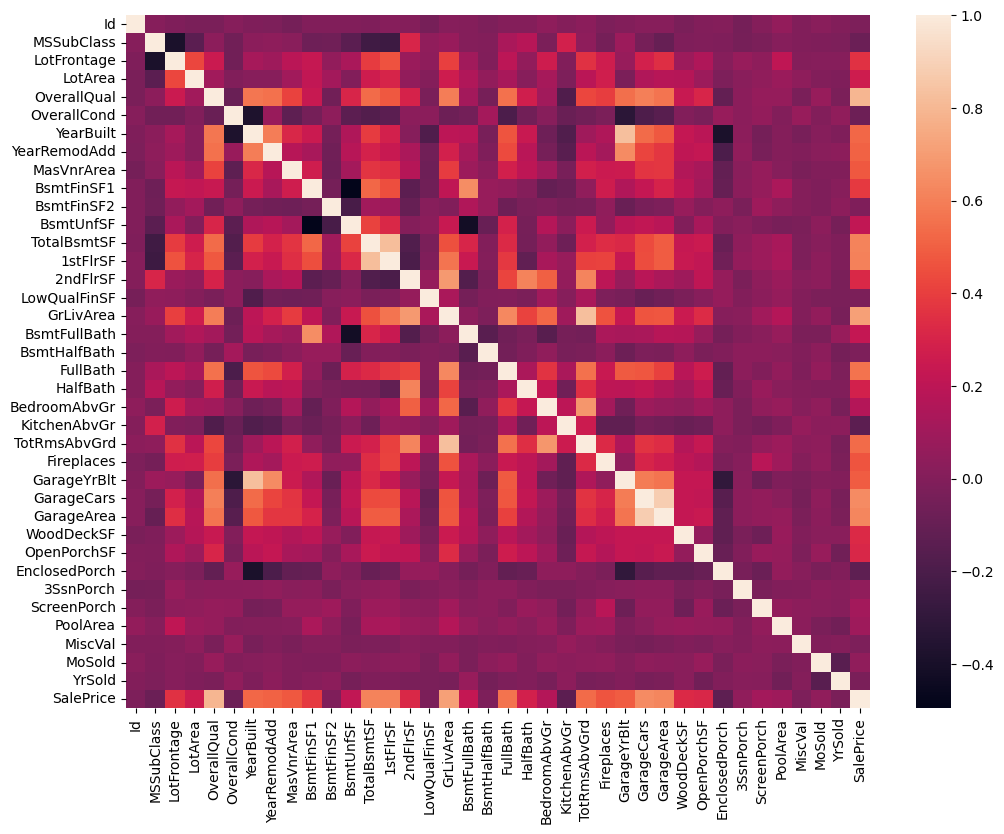

In [15]:
corr=df.corr()
f, ax = plt.subplots(figsize=(12, 9))
correlation=sns.heatmap(corr)

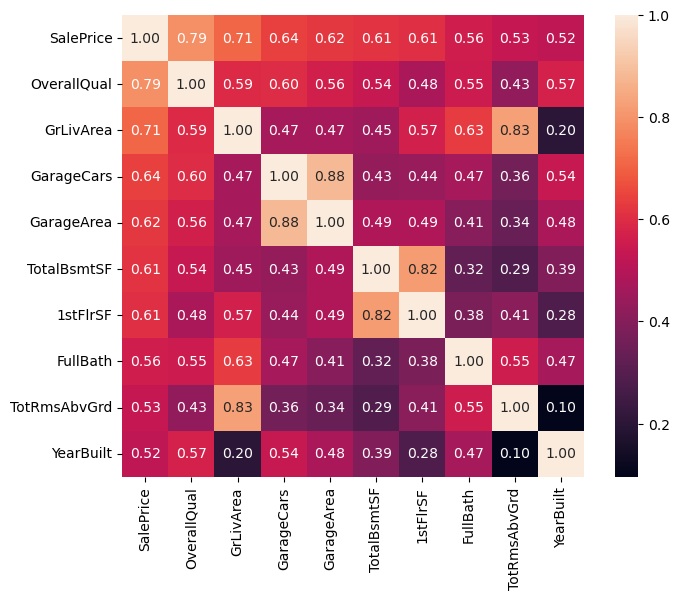

In [16]:
k=10
col=corr.nlargest(k,'SalePrice')['SalePrice'].index # select large ten columns from salesprice= ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Year']

cm=np.corrcoef(df[col].values.T)
# sns.set(font_scale=1.25)

ax,f=plt.subplots(figsize=(8,6))
hm=sns.heatmap(data=cm , square=True, annot=True, cbar=True, xticklabels=col.values, yticklabels=col.values ,  fmt='.2f')#annotبتظهر الارقام 

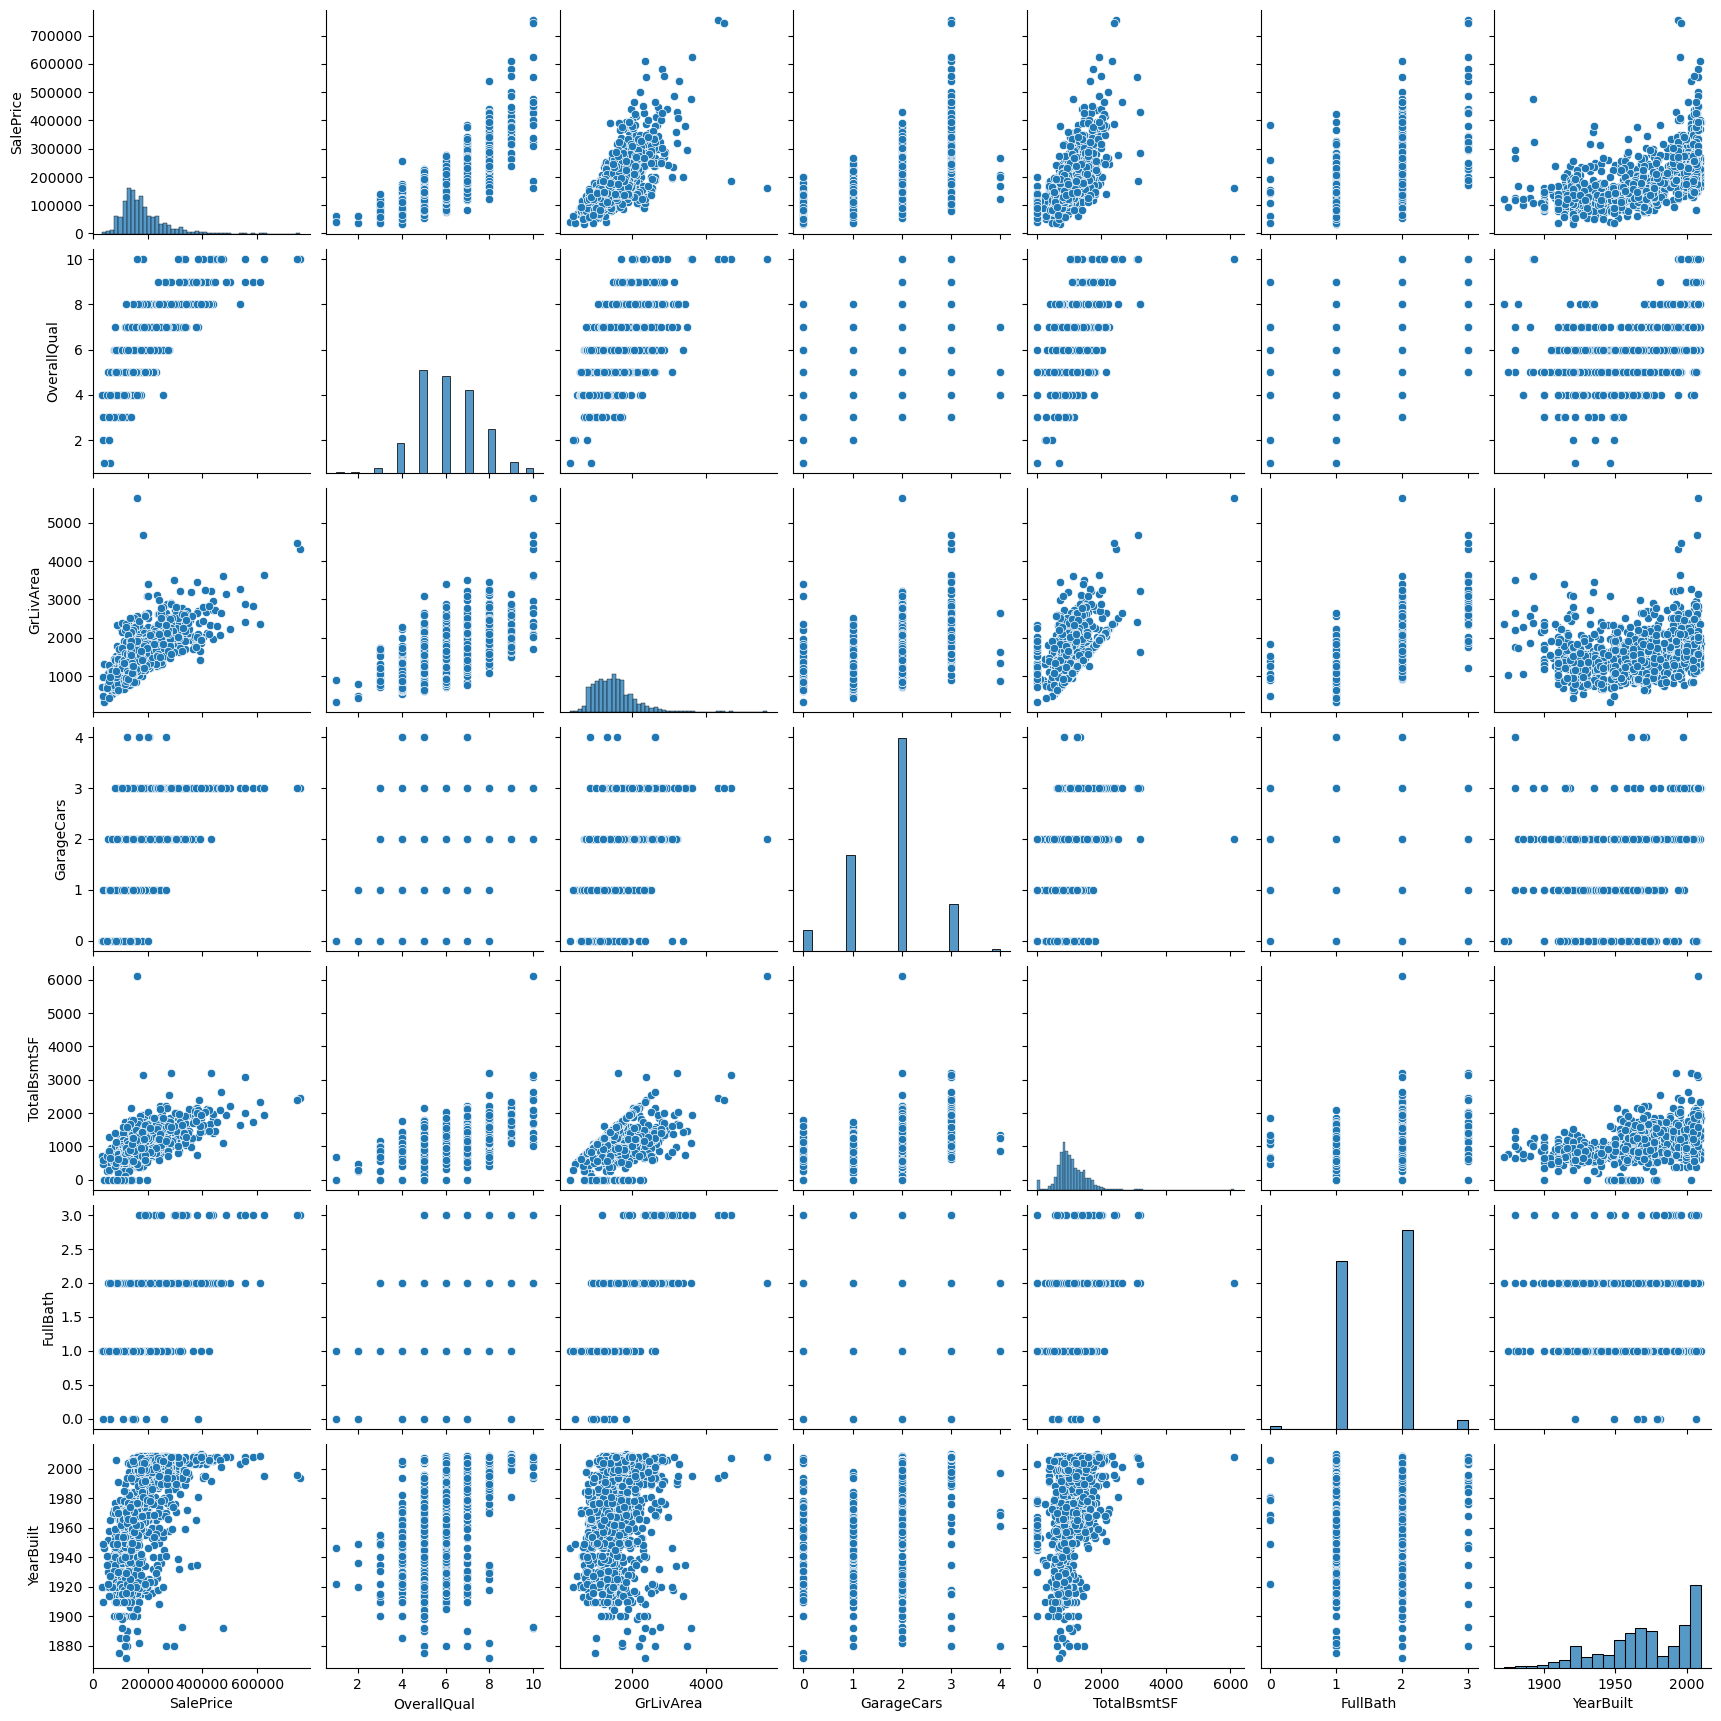

In [17]:
col=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[col],size=2.5)

In [18]:
# missing data
total=df.isnull().sum().sort_values(ascending=False)
percent= ((df.isnull().sum())/(df.isnull().count())).sort_values(ascending=False)

missing_data=pd.concat([total,percent] ,axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [19]:
df_train=df.drop((missing_data[missing_data['total']>1]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


In [20]:
print('missing data=',df_train.isnull().sum()[1])

missing data= 0


In [21]:
# out liears

In [22]:
SalePrice_scald=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_rang=SalePrice_scald[SalePrice_scald[:,0].argsort()][:10]
large_range=SalePrice_scald[SalePrice_scald[:,0].argsort()][-10:]


print('low_rang\n',low_rang)
print('large_range\n',large_range)


low_rang
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
large_range
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


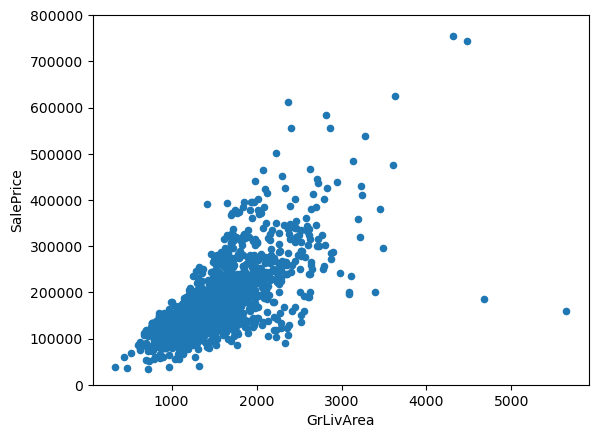

In [23]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


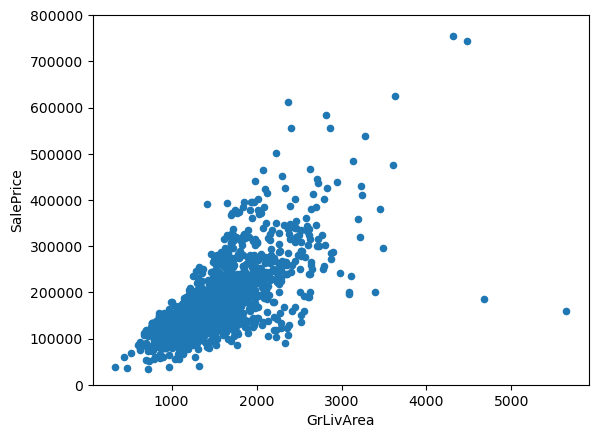

In [24]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

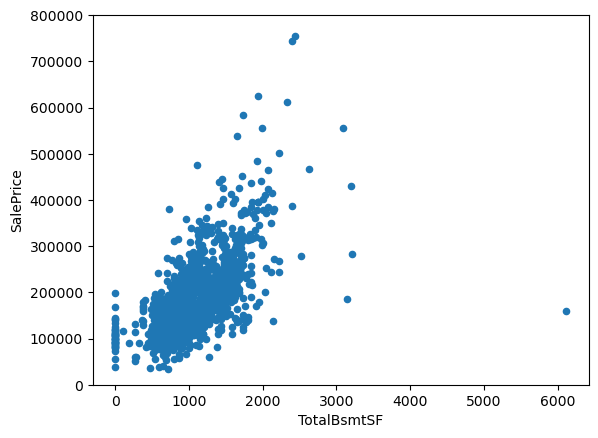

In [25]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

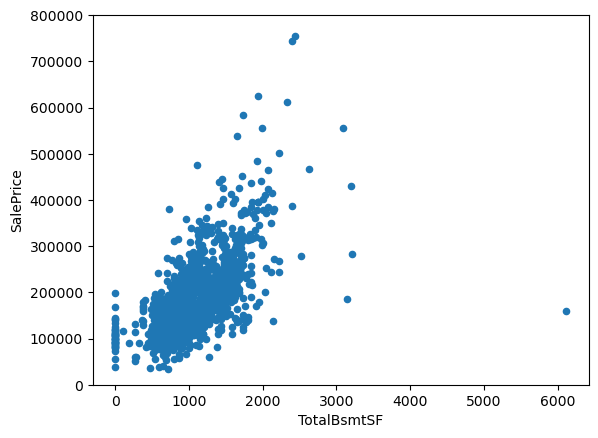

In [26]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

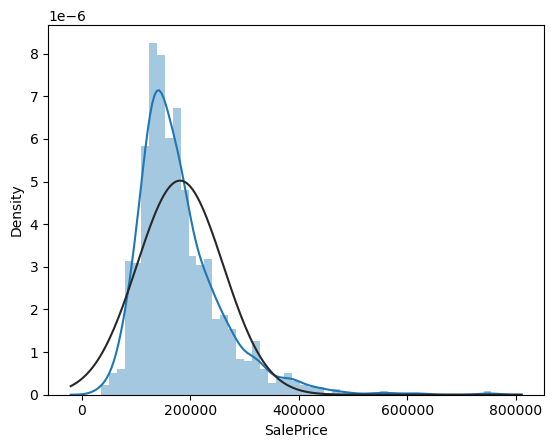

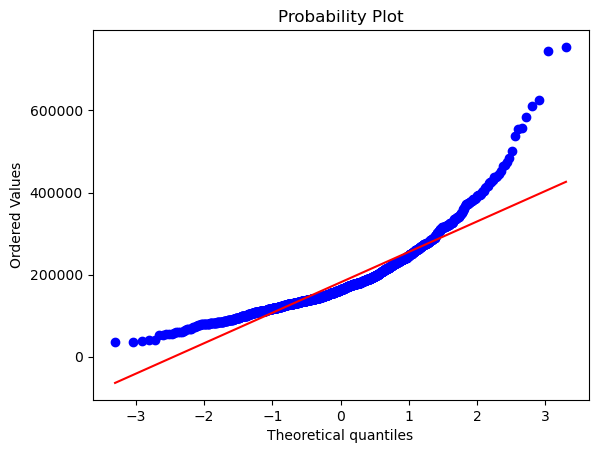

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [28]:
df_train['SalePrice']=np.log(df_train['SalePrice'])

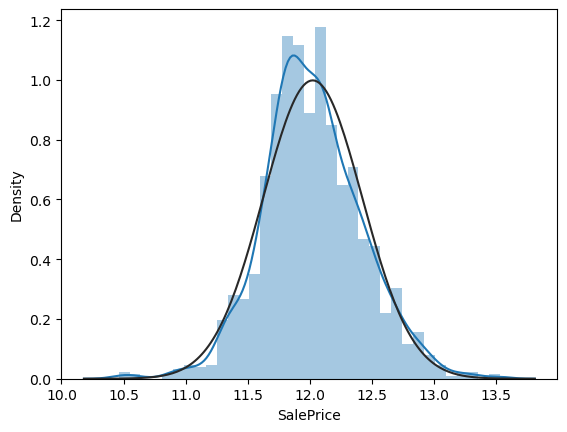

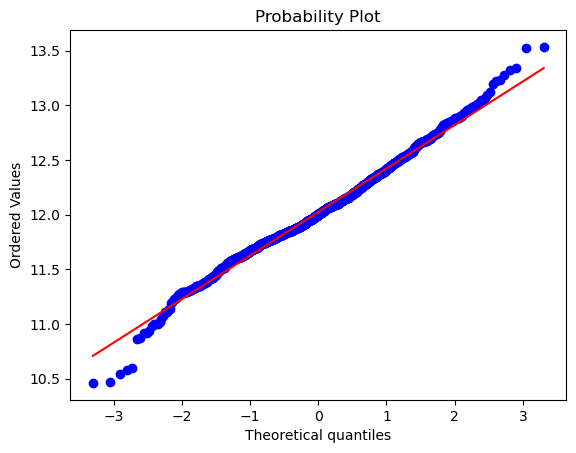

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

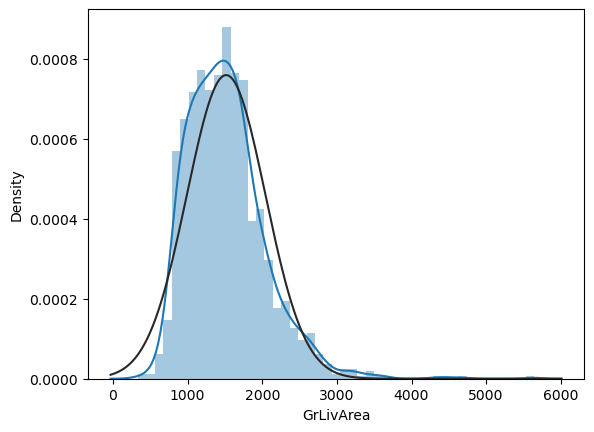

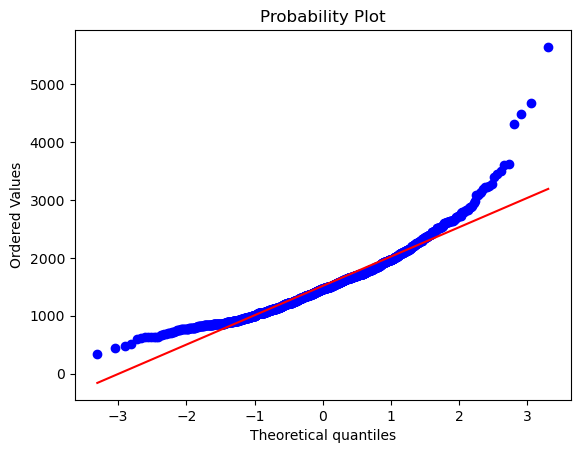

In [30]:
sns.distplot(df_train['GrLivArea'], fit =norm);
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

In [31]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])


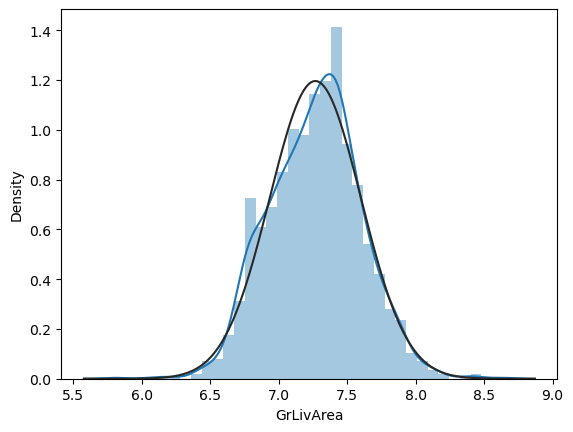

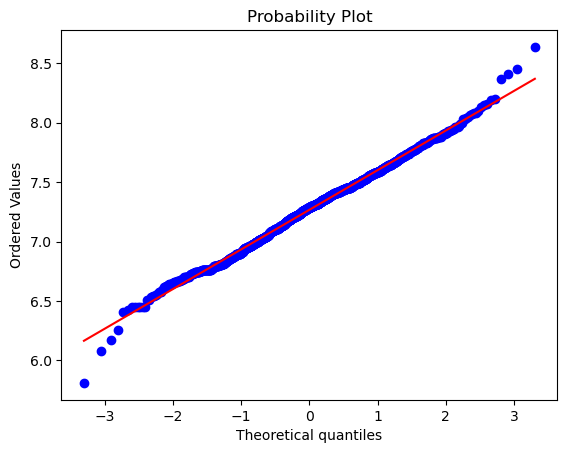

In [32]:
sns.distplot(df_train['GrLivArea'], fit =norm);
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)


In [33]:
col=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']


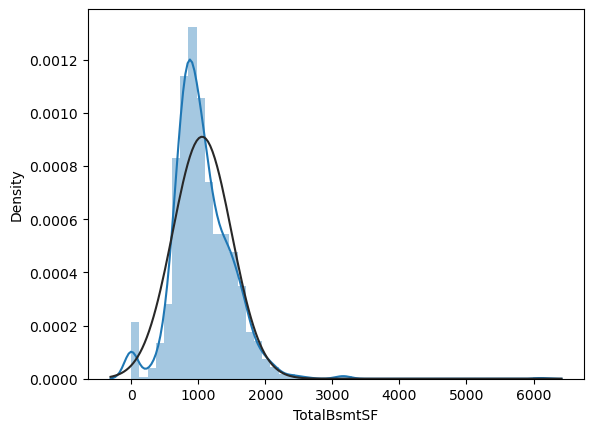

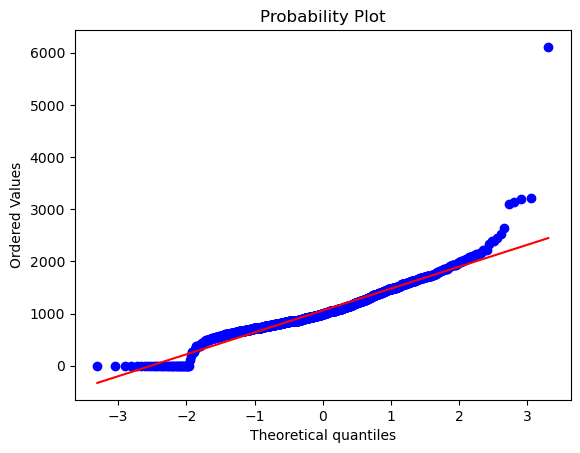

In [34]:
sns.distplot(df_train['TotalBsmtSF'], fit =norm);
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)


In [35]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

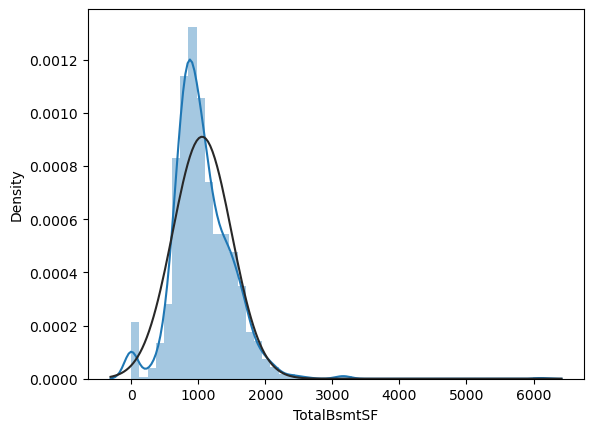

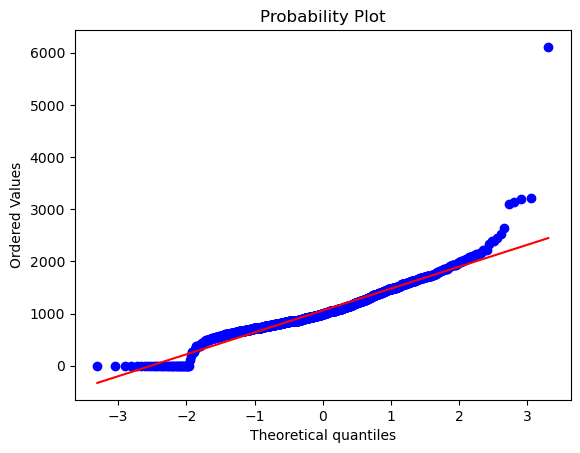

In [36]:
sns.distplot(df_train['TotalBsmtSF'], fit =norm);
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)


In [37]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

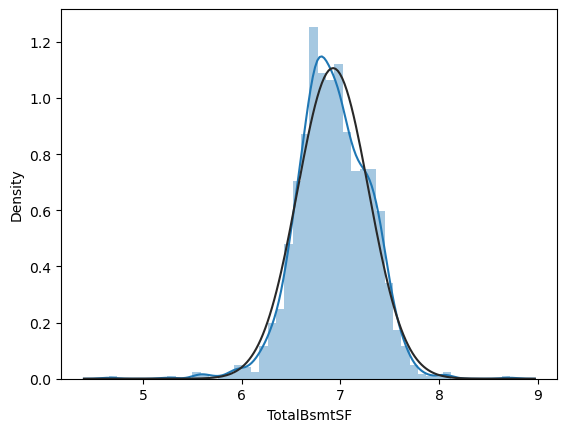

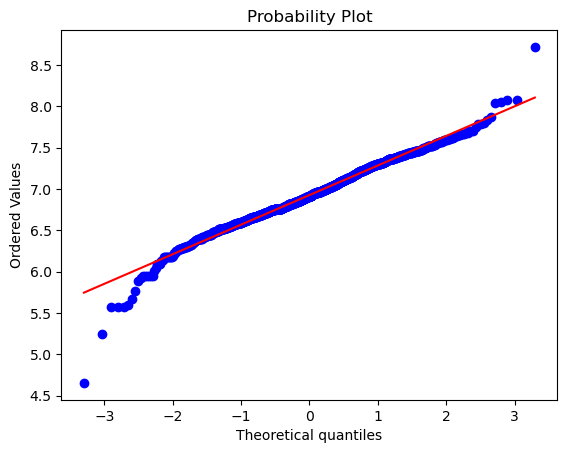

In [38]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


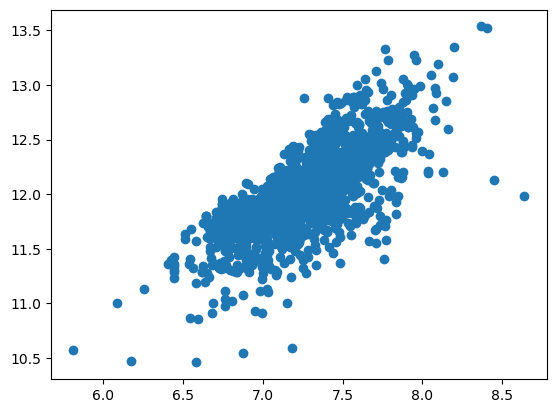

In [39]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

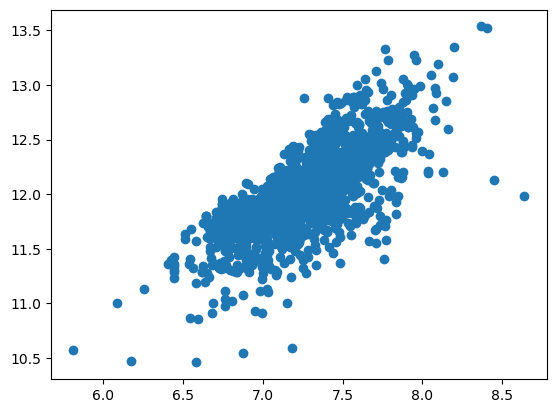

In [40]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [41]:
df_train = pd.get_dummies(df_train)


In [42]:
df_train.head(20)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [43]:
df_train=df_train.drop('Id',axis=1)

In [44]:
x=df_train.drop('SalePrice',axis=1)

In [45]:
y=df_train['SalePrice']

In [46]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى train و test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# تقسيم مجموعة الـ train إلى train و validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# يمكنك ضبط النسب حسب احتياجاتك، هنا تم استخدام 80% للتدريب، 10% للتحقق، و 10% للاختبار


In [47]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
print("val_score=",LR.score(X_val,y_val))
print("Train_score=",LR.score(X_train,y_train))

print('*****************************************************')

from sklearn.metrics import mean_absolute_error
LR_prd=LR.predict(X_test)
error=mean_absolute_error(y_test,LR_prd)
print('mean_absolute_error=',error)

from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,LR_prd)
print('mean_squared_error=',error)



val_score= 0.9083626873418414
Train_score= 0.9422478147921018
*****************************************************
mean_absolute_error= 0.0854419988311188
mean_squared_error= 0.015078521465373982


In [48]:
from sklearn.linear_model import RidgeCV
RC=RidgeCV(alphas=[10,50,90])
RC.fit(X_train,y_train)
print("train_score =",RC.score(X_train,y_train))
print("val_score=",RC.score(X_val,y_val))

print('*****************************************************')

from sklearn.metrics import mean_absolute_error
RC_prd=RC.predict(X_test)
error=mean_absolute_error(y_test,RC_prd)
print('mean_absolute_error=',error)

from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,RC_prd)
print('mean_squared_error=',error)



train_score = 0.9175760578328209
val_score= 0.8645072279100836
*****************************************************
mean_absolute_error= 0.09277981089637534
mean_squared_error= 0.01955620757543863


In [49]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor()
Dt.fit(X_train,y_train)
print("train_score =",Dt.score(X_train,y_train))
print("val_score=",Dt.score(X_val,y_val))

print('*****************************************************')

from sklearn.metrics import mean_absolute_error
RC_prd=Dt.predict(X_test)
error=mean_absolute_error(y_test,RC_prd)
print('mean_absolute_error=',error)

from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,RC_prd)
print('mean_squared_error=',error)

train_score = 1.0
val_score= 0.6819750774558497
*****************************************************
mean_absolute_error= 0.15878782816862375
mean_squared_error= 0.04897752817328032
